# Final Submission    
# STAT 441 Data Challenge 2

## 1. Import packages and pandas

In [1]:
#import packages and pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import numpy as np
from numpy.linalg import norm, inv
import scipy.io as sio
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
import math as m
import time
import seaborn as sns

#seed for reproducibility
seed = 1234567
np.random.seed(seed)

#Random Forest, ExtraTrees
from sklearn import svm, ensemble
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier

#SVM
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

## 2. Import training and testing data

In [2]:
#import training and testing data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 3. Data Exploration

### Data Visualisations & Exploration

#### Shape & data description

In [3]:
print("Training Data")
print(train.shape) #shape
#print(train.head()) #head

print("Testing Data")
print(test.shape) #shape
#print(test.head())#head

Training Data
(481011, 55)
Testing Data
(100000, 55)


In [4]:
train[train.isnull().any(axis=1)] #check for missing data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,soil_Type 32,soil_Type 33,soil_Type 34,soil_Type 35,soil_Type 36,soil_Type 37,soil_Type 38,soil_Type 39,soil_Type 40,Forest Cover Type


In [5]:
test[test.isnull().any(axis=1)] #check for missing data

,ids,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,soil_Type 31,soil_Type 32,soil_Type 33,soil_Type 34,soil_Type 35,soil_Type 36,soil_Type 37,soil_Type 38,soil_Type 39,soil_Type 40


There are no rows with null values in the training nor testing sets.

In [6]:
#train.describe()

In [7]:
#test.describe()

#### Correlations
Plot correlation map without Wilderness_Area and Soil_Type since they are binary values.     

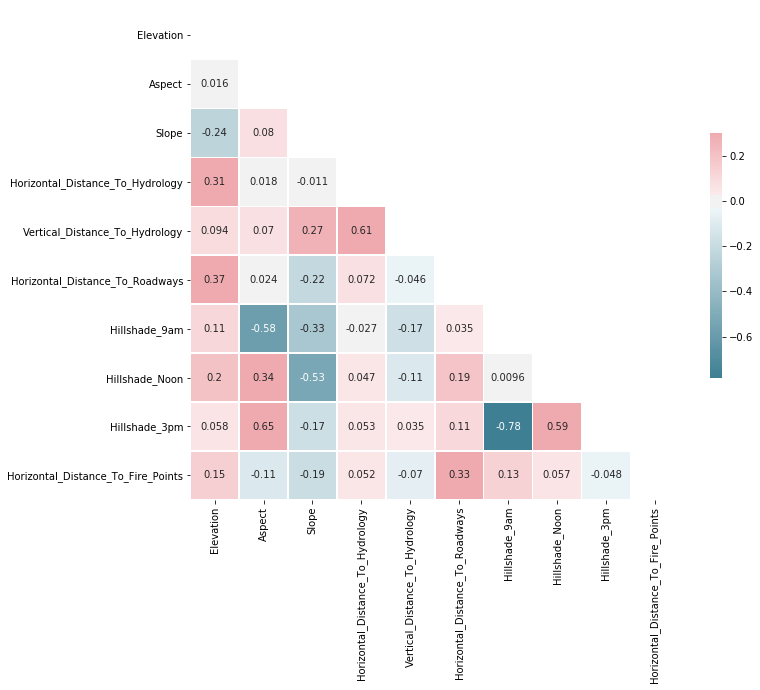

In [8]:
#Correlation
# Compute the correlation matrix
corr_mat = train.iloc[:,:10].corr()#without soil type & Wilderness areas since they are binary variables
cmap = sns.diverging_palette(250, 10, as_cmap=True) # Generate a custom diverging colormap

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### VIF

In [9]:
#VIF for 1st 10 features
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = add_constant(train.iloc[:,:10])
pd.Series([variance_inflation_factor(X.values, i)
for i in range(X.shape[1])], 
          index=X.columns)

const                                 4232.185316
Elevation                                1.336701
Aspect                                   1.863993
Slope                                    6.977782
Horizontal_Distance_To_Hydrology         1.813726
Vertical_Distance_To_Hydrology           1.832575
Horizontal_Distance_To_Roadways          1.301442
Hillshade_9am                          107.885044
Hillshade_Noon                          39.044445
Hillshade_3pm                          148.252926
Horizontal_Distance_To_Fire_Points       1.163611
dtype: float64

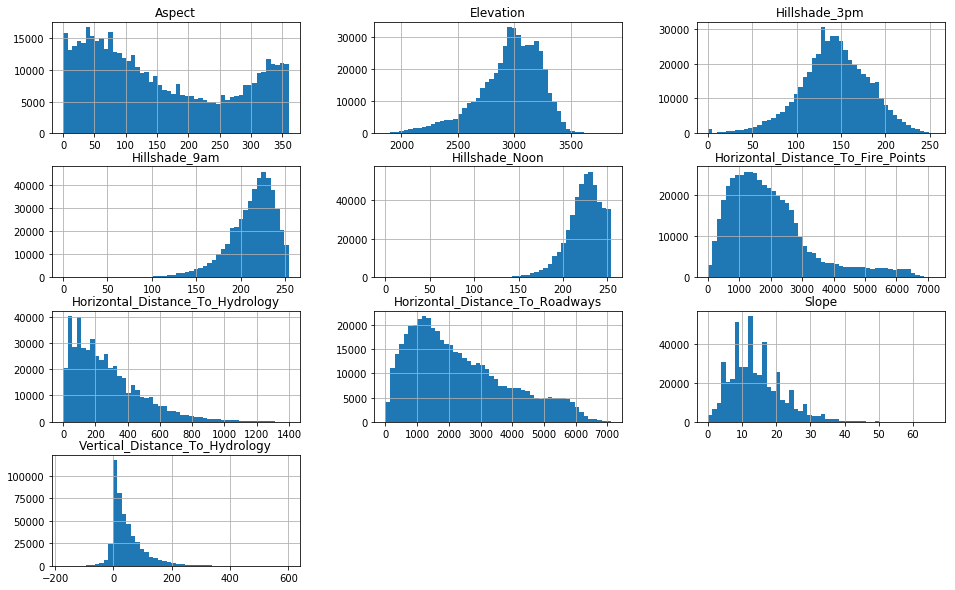

In [10]:
#without soil type & Wilderness areas since they are binary variables
train.iloc[:,:10].hist(figsize=(16,10), bins=50) 
plt.show()
#Notice Hhillshade_3pm has 0 values

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah Wilderness Area',
       'Neota Wilderness Area', 'Comanche Peak Wilderness Area',
       'Cache la Poudre Wilderness Area', 'soil_Type 1', 'soil_Type 2',
       'soil_Type 3', 'soil_Type 4', 'soil_Type 5', 'soil_Type 6',
       'soil_Type 7', 'soil_Type 8', 'soil_Type 9', 'soil_Type 10',
       'soil_Type 11', 'soil_Type 12', 'soil_Type 13', 'soil_Type 14',
       'soil_Type 15', 'soil_Type 16', 'soil_Type 17', 'soil_Type 18',
       'soil_Type 19', 'soil_Type 20', 'soil_Type 21', 'soil_Type 22',
       'soil_Type 23', 'soil_Type 24', 'soil_Type 25', 'soil_Type 26',
       'soil_Type 27', 'soil_Type 28', 'soil_Type 29', 'soil_Type 30',
       'soil_Type 31', 'soil_Type 32', 'soil_Type 33', 'soil_Type 34',
       'soil_Type 35',

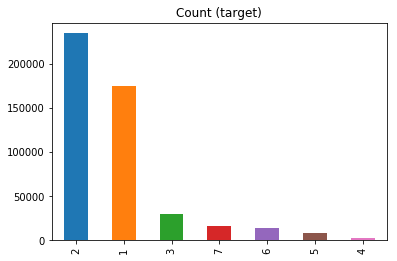

In [11]:
print(train.columns)
print(train.groupby("Forest Cover Type").size()) #unbalanced
target = train["Forest Cover Type"]
target_count = target.value_counts()
target_count.plot(kind='bar', title='Count (target)')

Notice from the correlation map: (high correlation suggests that we could drop one)
- Hillshade_9am and Hillshade_3pm = -0.78
- Hillshade_9am and Aspect = -0.58
- Slope and Hillshade_Noon = -0.53
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
- Aspect and Hillshade_3pm = 0.65
- Hillshade_Noon and Hillshade_3pm = 0.59

From above we see that:    
1. Soil type 7 and 15 are constant(each value is zero), so we could remove from both the training and testing sets.  
2. Hillshade_9AM,Hillshade_Noon, Hillshade_3pm have high VIF > 10 => multicolinearity, possibly remove.  
3. Slope also has VIF > 5, which could be a problem, could possibly remove. 
4. Wilderness_Area and Soil_Type are one hot encoded.

Class imbalance: Class 2 and 1 have more values that the other classes
So we can try to balance this by:    
- oversampling points with type = 3,4,5,6,7,1
- undersampling points with type = 2
We'll use SMOTE for this.

## 4. Data Transformations.

In [12]:
#dropsoil = ['soil_Type 7','soil_Type 15', 'soil_Type 28','soil_Type 26','soil_Type 25',
            #'soil_Type 5','soil_Type 8','soil_Type 9','soil_Type 36','soil_Type 18','soil_Type 14']
train = train.drop(['soil_Type 7','soil_Type 15'], axis = 1)
test = test.drop(['soil_Type 7','soil_Type 15'], axis = 1)
#---------------------------------------------------------------------------------------------------------------------#
Train_trans = train.copy() #duplicate
Test_trans = test.copy() #duplicate
#---------------------------------------------------------------------------------------------------------------------#
#Treat the 0 values in Hillshade_3pm as missing values and replace with the median
#Train_trans['Hillshade_3pm'].hist(figsize=(16,10), bins=50) 
#plt.show()
hs_median = np.median(Train_trans['Hillshade_3pm'])
Train_trans['Hillshade_3pm'] =Train_trans['Hillshade_3pm'].replace(0, hs_median)
hstest_median = np.median(Test_trans['Hillshade_3pm'])
Test_trans['Hillshade_3pm'] =Test_trans['Hillshade_3pm'].replace(0, hstest_median)
#Train_trans['Hillshade_3pm'].hist(figsize=(16,10), bins=50) 
#plt.show()
#---------------------------------------------------------------------------------------------------------------------#
#Combine Wilderness Areas since these are one hot type encoded vectors
Train_trans.rename(columns={'Rawah Wilderness Area': 'Wilderness_Area1', 
                                          'Neota Wilderness Area':'Wilderness_Area2',
                                          'Comanche Peak Wilderness Area':'Wilderness_Area3',
                                          'Cache la Poudre Wilderness Area':'Wilderness_Area4'}, inplace = True)
Test_trans.rename(columns={'Rawah Wilderness Area': 'Wilderness_Area1', 
                                          'Neota Wilderness Area':'Wilderness_Area2',
                                          'Comanche Peak Wilderness Area':'Wilderness_Area3',
                                          'Cache la Poudre Wilderness Area':'Wilderness_Area4'}, inplace = True)
#------------------------------------------------------------------------------------------------#  
Train_trans['Wilderness_Area']=0
for i in range(1,5):
    Train_trans['Wilderness_Area']=Train_trans['Wilderness_Area']+i*Train_trans['Wilderness_Area'+str(i)]
#------------------------------------------------------------------------------------------------#   
Test_trans['Wilderness_Area']=0
for i in range(1,5): #4 wilderness Areas
    Test_trans['Wilderness_Area']=Test_trans['Wilderness_Area']+i*Test_trans['Wilderness_Area'+str(i)]
#------------------------------------------------------------------------------------------------#     
Train_trans = Train_trans.drop(['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis = 1)
Test_trans = Test_trans.drop(['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis = 1)
#---------------------------------------------------------------------------------------------------------------------#
#Soiltype
x = list(range(1,41))
x.remove(7)
x.remove(15)
#x.remove(28)
#x.remove(26)
#x.remove(25)
#x.remove(5)
#x.remove(8)
#x.remove(9)
#x.remove(36)
#x.remove(18)
#x.remove(14)
#------------------------------------------------------------------------------------------------#
#Combine Soil_Type since these are one hot type encoded vectors
#we already dropped 11 soil_types
Train_trans['soil']=0
for i in x:
    Train_trans['soil']=Train_trans['soil']+i*Train_trans['soil_Type '+str(i)]
#    
Test_trans['soil']=0
for i in x:
    Test_trans['soil']=Test_trans['soil']+i*Test_trans['soil_Type '+str(i)]
#------------------------------------------------------------------------------------------------#
for i in x:
    st = 'soil_Type '+str(i)
    Train_trans = Train_trans.drop(st, axis = 1)
#
for i in x:
    st = 'soil_Type '+str(i)
    Test_trans = Test_trans.drop(st, axis = 1)
#---------------------------------------------------------------------------------------------------------------------#

In [13]:
print(Train_trans.shape, Test_trans.shape)

(481011, 13) (100000, 13)


In [14]:
#drop since they have high VIF
Train_trans = Train_trans.drop(["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm"],axis = 1)
Test_trans = Test_trans.drop(["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm"],axis = 1)

In [15]:
#Seperate X and Y values in the train and test set.
#Y
Ytrans_training = Train_trans["Forest Cover Type"].values #forest cover type
Ytrans_testing= Test_trans["ids"].values #ids
#X
Xtrans_training = Train_trans.drop("Forest Cover Type",axis = 1).values #all variables except Cover type (i.e. the y value)
Xtrans_testing = Test_trans.drop("ids", axis = 1).values #all variables except ids (i.e. the y value)
#Split into validation and training sets
Xtrans_train, Xtrans_val, Ytrans_train, Ytrans_val= train_test_split(Xtrans_training,Ytrans_training,test_size=0.2)
#----------------------------------------------------------------------------------------------------------#

In [16]:
print(Train_trans.shape, Test_trans.shape)

(481011, 10) (100000, 10)


## 5. Feature Engineering

In [17]:
def feature_engineering(dataset):
    data = dataset
    
    #sqrt(HD_Hyd^2 + VD_Hyd^2)
    data['Distance_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2 + 
                                     data['Vertical_Distance_To_Hydrology']**2)**0.5
    
    #HD_Hyd (+ then -) HD_Fire
    data['HdHyd_plus_HdFire'] = data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Fire_Points']
    data['HdHyd_minus_HdFire'] = data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Fire_Points']
    
     #HD_Hyd (+ then -) HD_Road
    data['HdHyd_plus_HdRoad'] = data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways']
    data['HdHyd_minus_HdRoad'] = data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Roadways']
    
     #HD_Fire (+ then -) HD_Road
    data['HdFire_plus_HdRoad'] = data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Roadways']
    data['HdFire_minus_HdRoad'] = data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Roadways']
    
    #Elevation - Hor_Road
    data["Elev_minus_HdRoad"] = data["Elevation"] - data["Horizontal_Distance_To_Roadways"]
    
    #Elevation (+ then -) Vert_Hyd
    data["Elev_minus_VdHyd"] = data["Elevation"] - data["Vertical_Distance_To_Hydrology"]
    data["Elev_plus_VdHyd"] = data["Elevation"] + data["Vertical_Distance_To_Hydrology"]
    
    #Elevation - Hor_Hyd
    data["Elev_minus_HdHyd"] = data["Elevation"] - data["Horizontal_Distance_To_Hydrology"]
    
    #Elevation - Hor_Fire
    data["Elev_minus_HdFire"] = data["Elevation"] - data["Horizontal_Distance_To_Fire_Points"]
    
    #Elevation - soil
    data["Elev_minus_soil"] = data["Elevation"] - data["soil"]
    
    #Elevation - soil
    data["Elev_minus_WA"] = data["Elevation"] - data["Wilderness_Area"]
    return data

In [18]:
feature_engineering(Train_trans)
feature_engineering(Test_trans)

#Seperate X and Y values in the train and test set.
#Y
Ytrans_training = Train_trans["Forest Cover Type"].values #forest cover type
Ytrans_testing= Test_trans["ids"].values #ids
#X
Xtrans_training = Train_trans.drop("Forest Cover Type",axis = 1).values #all variables except Cover type (i.e. the y value)
Xtrans_testing = Test_trans.drop("ids", axis = 1).values #all variables except ids (i.e. the y value)

In [19]:
print(Train_trans.shape, Test_trans.shape)

(481011, 24) (100000, 24)


In [20]:
#Rebalance Classes (i.e. cover types)
smote = SMOTE(ratio='all') #resample all classes
Xtrain_small, Ytrain_small = smote.fit_sample(Xtrans_training,Ytrans_training)
Xtest_small, Ytest_small = smote.fit_sample(Xtrans_testing,Ytrans_testing)
#Split into validation and training sets
Xtrans_trainsm, Xtrans_valsm, Ytrans_trainsm, Ytrans_valsm = train_test_split(Xtrain_small, Ytrain_small,test_size=0.2)

In [21]:
print(Xtrans_trainsm.shape, Ytrans_trainsm.shape,Xtrans_valsm.shape,Ytrans_valsm.shape)

(1314801, 23) (1314801,) (328701, 23) (328701,)


## 6. Model

### Extra Trees Classifier

Training Extra Trees
Testing Extra Trees
EXT's prediction accuracy: 99.52
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     46983
           2       0.99      0.98      0.98     46693
           3       1.00      1.00      1.00     47328
           4       1.00      1.00      1.00     46961
           5       1.00      1.00      1.00     47031
           6       1.00      1.00      1.00     46902
           7       1.00      1.00      1.00     46803

   micro avg       1.00      1.00      1.00    328701
   macro avg       1.00      1.00      1.00    328701
weighted avg       1.00      1.00      1.00    328701

                                    importance
feature                                       
Elev_minus_soil                          0.117
Elevation                                0.116
Elev_minus_VdHyd                         0.110
soil                                     0.091
Elev_minus_WA                            0.087


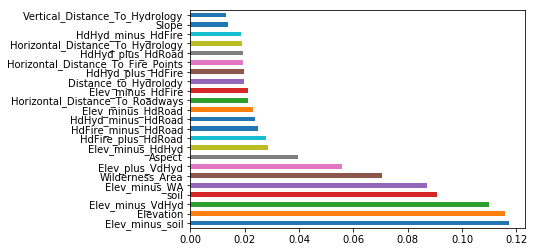

In [22]:
#fit model first
ext_clf100 = ExtraTreesClassifier(n_estimators = 100,n_jobs = 3,verbose = 0, max_features = 16,
                                  max_depth = 50, criterion='entropy')
print("Training Extra Trees")
ext_clf100.fit(Xtrans_trainsm, Ytrans_trainsm)
print("Testing Extra Trees")
ext_type_predADA = ext_clf100.predict(Xtrans_valsm)
print ("EXT's prediction accuracy: %3.2f" % (metrics.accuracy_score(Ytrans_valsm,ext_type_predADA)*100))
print(metrics.classification_report(Ytrans_valsm,ext_type_predADA))
#---------------------------------------------------------------------------------------------------------------#
fts = ext_clf100.feature_importances_
ind = Train_trans.drop("Forest Cover Type",axis = 1)
importances = pd.DataFrame({'feature':ind.columns,'importance':np.round(fts,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')     
print(importances)
(pd.Series(fts, index=ind.columns).nlargest(len(importances)).plot(kind='barh'))  
#---------------------------------------------------------------------------------------------------------------#
per = 0
cnt = 0
for i in importances["importance"]:
    if per <= 0.90:
        per += i
        cnt += 1
print("The first", cnt,"of", len(importances) ,"features, in order of importance, accounts for ", 
      np.round(per,3)*100.0, "% of features.")

#### Thresholds for selecting features by feature importance.
Fit model using each importance as a threshold.

In [23]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = sort(fts)

rf_thr = ExtraTreesClassifier(n_estimators = 100,n_jobs = 3,verbose = 0,
                                  max_depth = 50, criterion='entropy')
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(ext_clf100, threshold=thresh, prefit=True)
    select_train_x = selection.transform(Xtrans_trainsm) 
    
    # training model
    selection_model = rf_thr
    selection_model.fit(select_train_x, Ytrans_trainsm)
    
    # evaluating model
    select_test_x = selection.transform(Xtrans_valsm)
    pred_y = selection_model.predict(select_test_x)
    predictions = [round(value) for value in pred_y]
    accuracy = metrics.accuracy_score(Ytrans_valsm, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_train_x.shape[1], accuracy*100.0))

### Extra Trees Classifier w/ ADA Boost

In [ ]:
rng = np.random.RandomState(1)
ext_clf_EXT = ExtraTreesClassifier(n_estimators = 300,n_jobs = 3,verbose = 2, max_features = 16,
                                  max_depth = 50, criterion='entropy')
ext_clfADA = AdaBoostClassifier(base_estimator = ext_clf_EXT,n_estimators = 100,learning_rate = 0.1, 
                                      random_state=rng)
print("Training Extra Trees")
ext_clfADA.fit(Xtrans_trainsm, Ytrans_trainsm)
print("Testing Extra Trees")
ext_type_predADA = ext_clfADA.predict(Xtrans_valsm)
print ("EXT's prediction accuracy: %3.2f" % (metrics.accuracy_score(Ytrans_valsm,ext_type_predADA)*100))
print(metrics.classification_report(Ytrans_valsm,ext_type_predADA))

Training Extra Trees


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.7min


building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  7.6min


building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300


[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 14.6min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


## 7. Submission

In [25]:
#Submission
#retrain with entire training set
ext_clfADA.fit(Xtrain_small, Ytrain_small)
#predict
Fcovertype_pred = ext_clfADA.predict(Xtest_small)
#print sumbmission results to a csv 
submission = {"ids":Ytest_small, "Forest Cover Type":Fcovertype_pred }
submission = pd.DataFrame(submission,  columns = ["ids","Forest Cover Type"])
print(submission.head())

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.3min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.4s


   ids  Forest Cover Type
0    1                  1
1    2                  1
2    3                  1
3    4                  1
4    5                  1


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.1s finished


In [26]:
print(submission.tail())
submission.to_csv("finalsubmission.csv",index=False)

          ids  Forest Cover Type
99995   99996                  7
99996   99997                  1
99997   99998                  2
99998   99999                  3
99999  100000                  5
